<a href="https://colab.research.google.com/github/Amrit1799/Cognitive-Analysis/blob/main/CA(LAB8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Datasets**

In [ ]:
import numpy as np
import pandas as pd

**Importing the MNIST Dataset**

In [ ]:
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784')


x, y = mnist['data'], mnist['target']


x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]

**Shape of the train and test data**

In [ ]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [ ]:
x_train[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

**Visualizing few instances of the MNIST dataset**

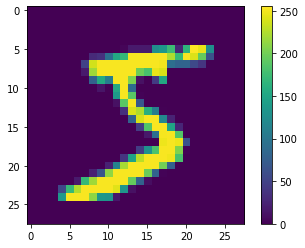

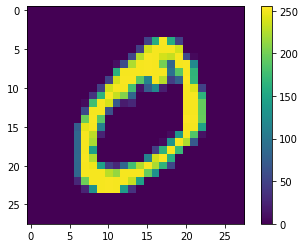

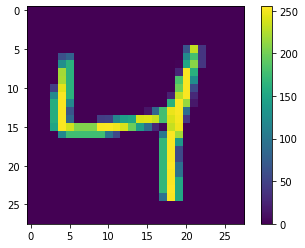

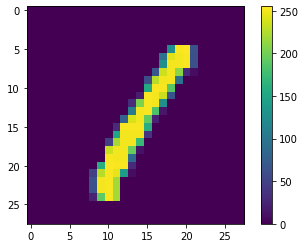

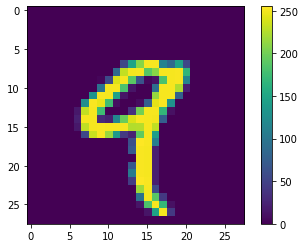

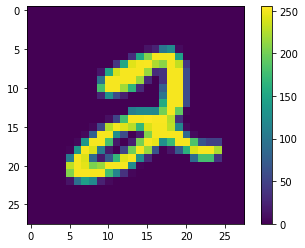

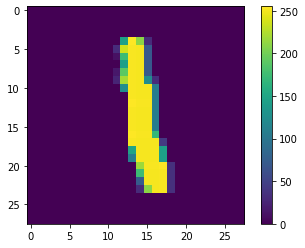

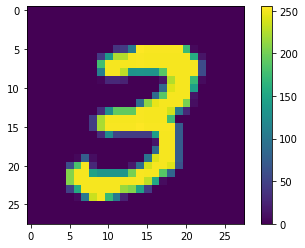

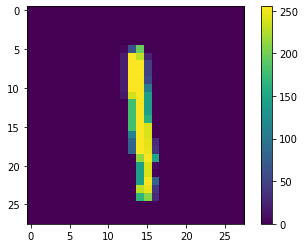

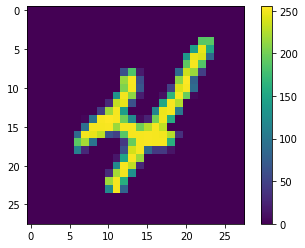

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot_image = x_train.reshape(x_train.shape[0], 28, 28)
for i in range (10):
  plt.figure()
  plt.imshow(plot_image[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()


In [ ]:
i=0
for i in range (10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


**Histogram showing the count of the various digits**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


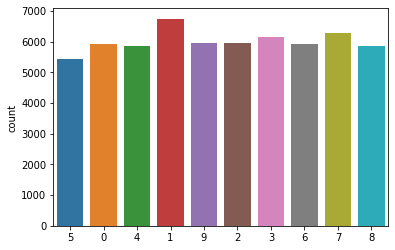

In [ ]:
#Check the frequency of each number
sns.countplot(y_train)

In [ ]:
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

**Importing the XGBOOST classifier to fit in the train data**

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(tol = 0.1)

In [ ]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tol=0.1, verbosity=1)

In [ ]:
clf.predict(x_test[:2])

array(['7', '2'], dtype=object)

In [ ]:
y_test[:2]

array(['7', '2'], dtype=object)

**Predicting the values**

In [ ]:
y_pred = clf.predict(x_test[::])

In [ ]:
y_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

**Classification Report Showing Accuracy of 94%**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print ("Classification Report")
print(classification_report(y_test,y_pred))
print ("Confusion Report")
print(confusion_matrix(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.93      0.92      0.93       982
           5       0.94      0.91      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.92      0.92       974
           9       0.88      0.91      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Report
[[ 967    0    1    0    0    3    3    1    4    1]
 [   0 1117    4    2    0    1    4    1    6    0]
 [  11    1  961   15   10    0    6   12   13    3]
 [   5    0   20  927    2   16    4   10  

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score as cvs
cvs(clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.93145, 0.93325, 0.9332 ])